In [ ]:
import numpy as np
import pandas as pd
import seaborn

In [ ]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Number of passengers in the dataset
num_passengers = len(t)
print("Number of passengers:", num_passengers)


Number of passengers: 891


In [ ]:
# Count of distinct values in the 'who' column
distinct_who_values = t['who'].nunique()
print("Distinct values in 'who' column:", distinct_who_values)


Distinct values in 'who' column: 3


In [ ]:
# Count of missing values in each column
missing_values = t.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Passengers over 60 years old
passengers_over_60 = t[t['age'] > 60]
num_passengers_over_60 = len(passengers_over_60)
print("Passengers over 60 years old:", num_passengers_over_60)


Passengers over 60 years old: 22


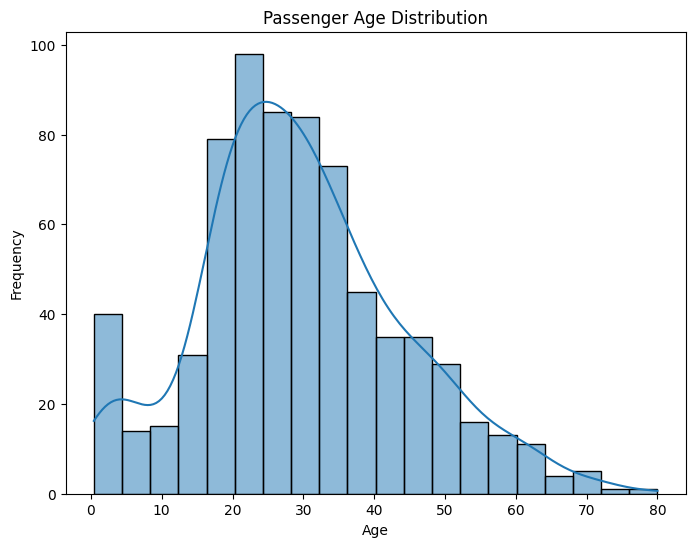

In [ ]:
import matplotlib.pyplot as plt

# Passenger age distribution plot
plt.figure(figsize=(8, 6))
seaborn.histplot(data=t, x="age", kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Passenger Age Distribution")
plt.show()


In [ ]:
# Calculate the 3-quantiles of passenger age distribution
quantiles = t['age'].quantile([0.25, 0.5, 0.75])
print("3-Quantiles of Passenger Age Distribution:")
print(quantiles)


3-Quantiles of Passenger Age Distribution:
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


In [ ]:
t = t.dropna(subset=['embarked'])


In [ ]:
len(t)

889

In [ ]:
fare_statistics = t['fare'].describe()
print(fare_statistics[['mean', 'min', 'max']])


mean     32.096681
min       0.000000
max     512.329200
Name: fare, dtype: float64


In [ ]:
class_proportions = t['class'].value_counts(normalize=True)
print(class_proportions)


Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [ ]:
gender_ratio = t.groupby(['class', 'sex']).size()
gender_ratio = gender_ratio.unstack()
gender_ratio['female_to_male_ratio'] = gender_ratio['female'] / gender_ratio['male']
print(gender_ratio['female_to_male_ratio'])


class
First     0.754098
Second    0.703704
Third     0.414986
Name: female_to_male_ratio, dtype: float64


In [ ]:
survival_fraction = t['survived'].mean()
print("Survival Fraction:", survival_fraction)


Survival Fraction: 0.38245219347581555


In [ ]:
survival_by_gender = t.groupby('sex')['survived'].mean()
print(survival_by_gender)


sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [ ]:
survival_by_class = t.groupby('class')['survived'].mean()
print(survival_by_class)


class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [ ]:
survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print(survival_table)


sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [ ]:
table = t.pivot_table(index=['class', 'sex'], values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'})
print(table)


                     fare  survived
class  sex                         
First  female  106.693750        89
       male     67.226127        45
Second female   21.970121        70
       male     19.741782        17
Third  female   16.118810        72
       male     12.661633        47
